<a href="https://colab.research.google.com/github/Shawnequa/Employee-Data/blob/main/Employee_Data_Linear_Regression_Interaction_Term.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference Information & Descriptions

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Load CSV data

In [46]:
df = pd.read_csv('/content/employee_data.csv')

Display basic information

In [47]:
print(df.head())
print(df.info())
print(df.describe())

   ID Gender  Experience (Years)               Position  Salary
0   1      F                   4        DevOps Engineer  109976
1   2      M                   6        DevOps Engineer  120088
2   3      M                  17          Web Developer  181301
3   4      M                   7  Systems Administrator   77530
4   5      F                  13  Systems Administrator  152397
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  400 non-null    int64 
 1   Gender              400 non-null    object
 2   Experience (Years)  400 non-null    int64 
 3   Position            400 non-null    object
 4   Salary              400 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.8+ KB
None
               ID  Experience (Years)        Salary
count  400.000000          400.000000     400.00000
mean   200.50000

Drop Catergorical Variables

In [48]:
df = df.drop(['ID'], axis=1)

Check for missing variables

In [49]:
df.isna().sum()

,0
Gender,0
Experience (Years),0
Position,0
Salary,0


Data Exploration -  Basic Statistics

In [50]:
print(df.describe())

       Experience (Years)        Salary
count          400.000000     400.00000
mean             9.670000  131701.19750
std              6.101571   43351.50899
min              0.000000   43643.00000
25%              4.000000  100484.75000
50%             10.000000  128561.50000
75%             15.000000  157735.00000
max             20.000000  269950.00000


Create a scatter plot with a regression line for each job role

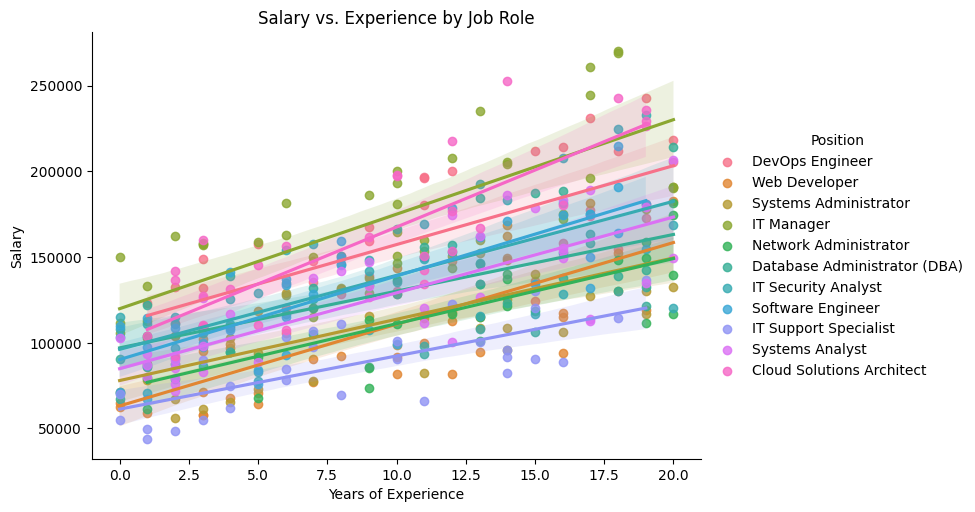

In [51]:
sns.lmplot(x='Experience (Years)', y='Salary', hue='Position', data=df, aspect=1.5)

plt.title('Salary vs. Experience by Job Role')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Encode Categorical Variables

In [52]:
#dummy variables for the Position column
# Assume df is your original DataFrame
df_encoded = pd.get_dummies(df, columns=['Position'], drop_first=True)

# Verify that the columns are encoded correctly
print(df_encoded.columns)

Index(['Gender', 'Experience (Years)', 'Salary',
       'Position_Database Administrator (DBA)', 'Position_DevOps Engineer',
       'Position_IT Manager', 'Position_IT Security Analyst',
       'Position_IT Support Specialist', 'Position_Network Administrator',
       'Position_Software Engineer', 'Position_Systems Administrator',
       'Position_Systems Analyst', 'Position_Web Developer'],
      dtype='object')


In [55]:
# Ensure all necessary conversions are made
df_encoded = df_encoded.astype({'Position_Database Administrator (DBA)': 'int64',
                                'Position_DevOps Engineer': 'int64',
                                'Position_IT Manager': 'int64',
                                'Position_IT Security Analyst': 'int64',
                                'Position_IT Support Specialist': 'int64',
                                'Position_Network Administrator': 'int64',
                                'Position_Software Engineer': 'int64',
                                'Position_Systems Administrator': 'int64',
                                'Position_Systems Analyst': 'int64',
                                'Position_Web Developer': 'int64'})

# Encode Gender
df_encoded['Gender'] = df_encoded['Gender'].map({'M': 1, 'F': 0})



Create Interaction Terms

In [56]:
# Creating the interaction term
df_encoded['Experience_Position_SE'] = df_encoded['Experience (Years)'] * df_encoded['Position_Software Engineer']

# Prepare your features including the interaction term
X = df_encoded[['Experience (Years)', 'Position_Software Engineer', 'Experience_Position_SE']]
X = sm.add_constant(X)  # Adds a constant term to the model

# Define the dependent variable
y = df_encoded['Salary']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     82.42
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           1.89e-41
Time:                        01:35:52   Log-Likelihood:                -4740.9
No. Observations:                 400   AIC:                             9490.
Df Residuals:                     396   BIC:                             9506.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               